# Tarefa 1 - Aplicações de modelos no dataset de controlo (Occipital Lobe)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import random

In [2]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

# Fixar a seed
set_seed(2023)

In [3]:
data_treino = pd.read_csv('./data_mod_occ/dataset_treino.csv', na_filter=False)

In [4]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2035 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(2004), int64(30), object(1)
memory usage: 4.7+ MB


## Conversão de dados do tipo 64 para 32

In [5]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2035 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(2004), int32(30), object(1)
memory usage: 2.4+ MB


## Normalização de Dados

In [6]:
from sklearn.preprocessing import MinMaxScaler
data_treino_normalize = data_treino.copy()

X_scale = data_treino_normalize.drop(columns=['Transition'])

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_scale)
X_scale = pd.DataFrame(scaler_X.transform(X_scale[X_scale.columns]), columns=X_scale.columns)
data_treino_normalize = pd.concat([X_scale, data_treino_normalize['Transition']], axis=1)

data_treino_normalize.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,com_x,com_y,com_z,Transition
0,0.468027,0.393701,0.409914,0.333333,0.251573,0.359861,0.395592,0.455584,0.426032,0.419046,...,0.756098,0.316832,0.48,0.217391,0.633333,0.393939,0.694211,0.349022,0.543109,CN-CN
1,0.281221,0.488189,0.449100,0.333333,0.481976,0.398101,0.266972,0.252689,0.181339,0.321214,...,0.317073,0.693069,0.52,0.434783,0.400000,0.242424,0.318340,0.701876,0.370843,CN-CN
2,0.764980,0.212598,0.690233,1.000000,0.548329,0.517907,0.584512,0.476452,0.520553,0.602194,...,0.146341,0.415842,0.32,0.347826,0.666667,0.606061,0.105849,0.483781,0.509471,AD-AD
3,0.651078,0.338583,0.794276,0.333333,0.451810,0.517270,0.598422,0.492919,0.607120,0.565343,...,0.365854,0.178218,0.24,0.521739,0.766667,0.545455,0.330054,0.230961,0.545445,CN-MCI
4,0.382225,0.173228,0.427088,0.333333,0.279128,0.421833,0.537979,0.544799,0.520553,0.447677,...,0.341463,0.376238,0.52,0.391304,0.433333,0.484848,0.283193,0.400622,0.782491,CN-CN


## Conversão de dados do tipo 64 para 32 depois da normalização

In [7]:
float_features = data_treino_normalize.select_dtypes(include='float')
int_features = data_treino_normalize.select_dtypes(include='int')

data_treino_normalize[float_features.columns] = data_treino_normalize[float_features.columns].astype(np.float32)
data_treino_normalize[int_features.columns] = data_treino_normalize[int_features.columns].astype(np.int32)
data_treino_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2035 entries, diagnostics_Image-original_Mean to Transition
dtypes: float32(2034), object(1)
memory usage: 2.4+ MB


## Split dos Dados

In [8]:
from sklearn.model_selection import train_test_split

X_treino = data_treino_normalize.drop(columns=['Transition'])
y_treino = data_treino_normalize['Transition']

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.2, random_state=2023, stratify = y_treino)

## Feature Selection

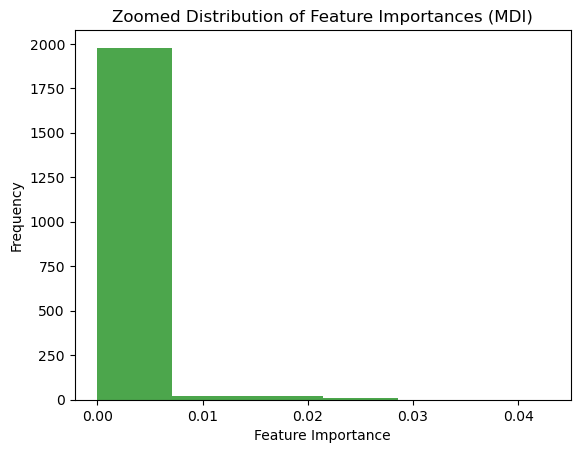

Features com importância MDI - 0: 1961


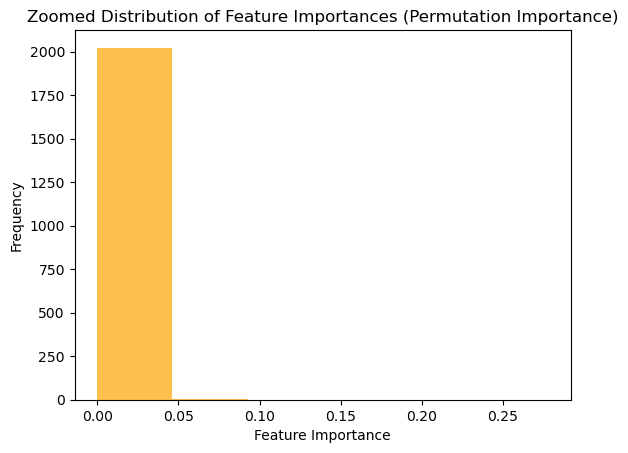

Features com importância Permutation - 0: 1961


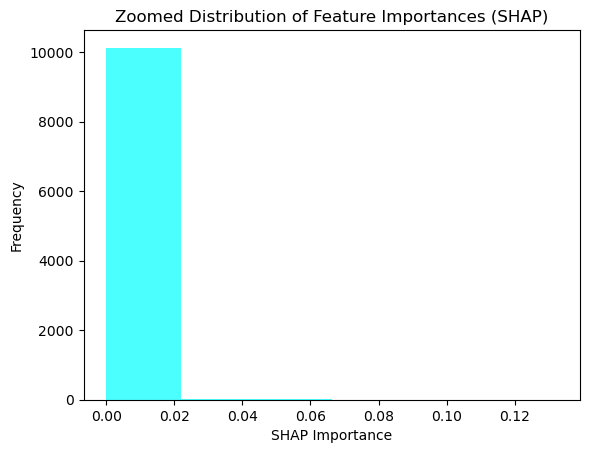

Features com importância SHAP - 0: 1982
Features a serem removidas (comuns a todas as abordagens): 1909


In [9]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=2023)
model.fit(X_treino, y_treino)

### 1. Feature Importance baseado em Mean Decrease in Impurity (MDI)
mdi_importances = model.feature_importances_

plt.hist(mdi_importances, bins=6, range=(0, max(mdi_importances)), color='green', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (MDI)")
plt.show()

# Identificar features com importância MDI menor ou igual ao limite
mdi_threshold = 0
features_mdi = [feature for feature, importance in zip(X_treino.columns, mdi_importances) if importance == mdi_threshold]
print(f"Features com importância MDI - {mdi_threshold}: {len(features_mdi)}")

### 2. Feature Importance baseado em Permutation Importance
perm_importance = permutation_importance(model, X_treino, y_treino, n_repeats=5, random_state=2023, n_jobs = -1)
perm_importances = perm_importance.importances_mean

plt.hist(perm_importances, bins=6, range=(0, max(perm_importances)), color='orange', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (Permutation Importance)")
plt.show()

# Identificar features com importância de Permutation menor ou igual ao limite
perm_threshold = 0
features_perm = [feature for feature, importance in zip(X_treino.columns, perm_importances) if importance == perm_threshold]
print(f"Features com importância Permutation - {perm_threshold}: {len(features_perm)}")

### 3. Feature Importance baseado em SHAP
# Criar valores SHAP para o modelo
explainer = shap.TreeExplainer(model, X_treino)
shap_values = explainer(X_treino, check_additivity=False)

# Calcular a média dos valores absolutos de SHAP para cada feature
shap_importances = np.abs(shap_values.values).mean(axis=0)

# Garantir que shap_importances seja uma lista ou array unidimensional
shap_importances = np.array(shap_importances).flatten()

plt.hist(shap_importances, bins=6, range=(0, max(shap_importances)), color='cyan', alpha=0.7)
plt.xlabel("SHAP Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (SHAP)")
plt.show()

# Identificar features com importância SHAP menor ou igual ao limite
shap_threshold = 0
features_shap = [feature for feature, importance in zip(X_treino.columns, shap_importances) if importance == shap_threshold]
print(f"Features com importância SHAP - {shap_threshold}: {len(features_shap)}")

### 4. Combinação de todas as abordagenspermutat
features_to_drop = list(
    set(features_mdi).intersection(set(features_perm)).intersection(set(features_shap))
)
print(f"Features a serem removidas (comuns a todas as abordagens): {len(features_to_drop)}")

In [10]:
### Remover as features identificadas
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)
X_treino = X_treino.drop(columns=features_to_drop)

print(f"Conjunto de treino reduzido: {X_treino.shape}")
print(f"Conjunto de teste e treino reduzido (split): {X_train.shape, X_test.shape}")

Conjunto de treino reduzido: (305, 125)
Conjunto de teste e treino reduzido (split): ((244, 125), (61, 125))


## Modelação

### Decision Tree Classifier

Accuracy: 32.79%
F1 Macro: 0.26
              precision    recall  f1-score   support

       AD-AD       0.32      0.50      0.39        12
       CN-CN       0.44      0.42      0.43        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.30      0.21      0.25        14
     MCI-MCI       0.21      0.21      0.21        14

    accuracy                           0.33        61
   macro avg       0.25      0.27      0.26        61
weighted avg       0.32      0.33      0.32        61



/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

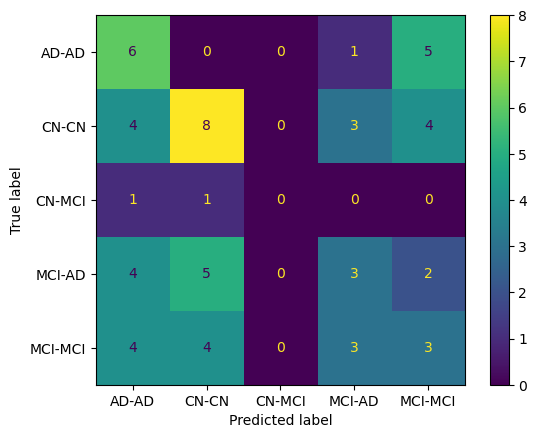

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

# Definir o modelo de Decision Tree e a grade de parâmetros
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=20,min_samples_split=5, random_state=2023)

dt_model.fit(X_train, y_train)

dt_score = dt_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (dt_score * 100))

predictionDTC = dt_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test, predictionDTC, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test, predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTC)
plt.show()

### Gradient Boosting Classifier

Accuracy: 31.15%
F1 Macro: 0.26
              precision    recall  f1-score   support

       AD-AD       0.44      0.33      0.38        12
       CN-CN       0.28      0.37      0.32        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.21      0.21      0.21        14
     MCI-MCI       0.38      0.36      0.37        14

    accuracy                           0.31        61
   macro avg       0.26      0.25      0.26        61
weighted avg       0.31      0.31      0.31        61



/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

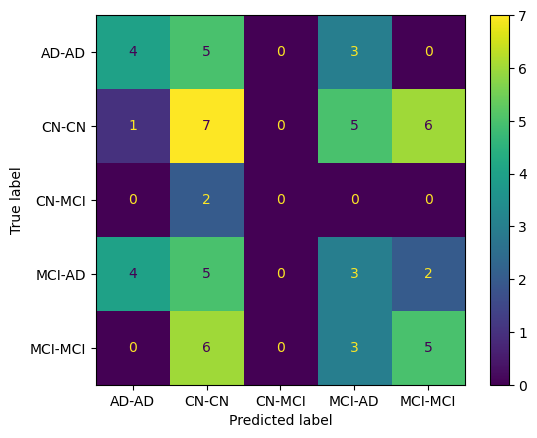

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

gbm_model = GradientBoostingClassifier(random_state=2023)

gbm_model.fit(X_train, y_train)

gbm_score = gbm_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (gbm_score * 100))

predictionGBM = gbm_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test, predictionGBM, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test, predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, predictionGBM)
plt.show()

### Random Forest Classifier

Accuracy: 32.79%
F1 Macro: 0.25
              precision    recall  f1-score   support

       AD-AD       0.40      0.33      0.36        12
       CN-CN       0.31      0.53      0.39        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.25      0.14      0.18        14
     MCI-MCI       0.36      0.29      0.32        14

    accuracy                           0.33        61
   macro avg       0.27      0.26      0.25        61
weighted avg       0.32      0.33      0.31        61



/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

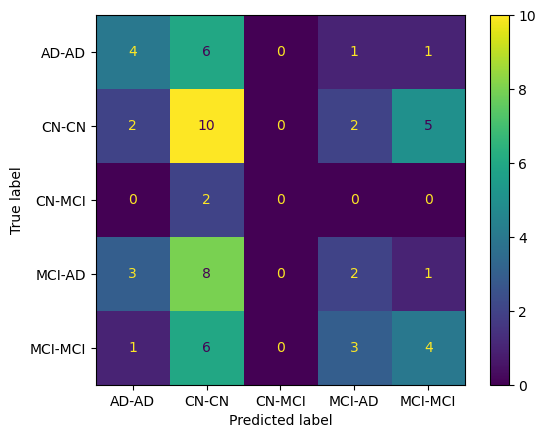

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

rfc_model = RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=15, random_state=2023)

rfc_model.fit(X_train, y_train)

rfc_score = rfc_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (rfc_score * 100))

predictionRFC = rfc_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test, predictionRFC, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test, predictionRFC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionRFC)
plt.show()

### Support Vector Machine

Accuracy: 31.15%
F1 Macro: 0.23
              precision    recall  f1-score   support

       AD-AD       0.42      0.42      0.42        12
       CN-CN       0.37      0.58      0.45        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.00      0.00      0.00        14
     MCI-MCI       0.33      0.21      0.26        14

    accuracy                           0.31        61
   macro avg       0.22      0.24      0.23        61
weighted avg       0.27      0.31      0.28        61



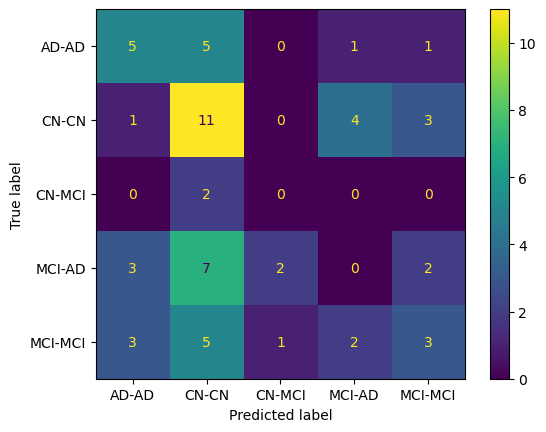

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

# Definir o modelo de Decision Tree e a grade de parâmetros
svm_model = SVC(C=1, gamma=0.1, kernel = 'linear', random_state=2023)

svm_model.fit(X_train, y_train)

svm_score = svm_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (svm_score * 100))

predictionSVM = svm_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test, predictionSVM, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test, predictionSVM))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVM)
plt.show()

### XGBoosting Classifier

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.333 total time=   0.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.318 total time=   0.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.193 total time=   0.2s
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,

/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

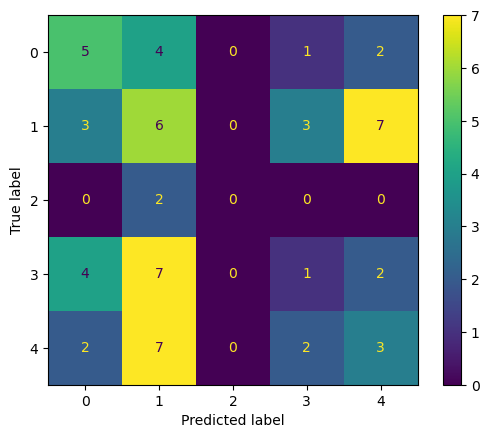

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Codifique as classes em y_treino e y_teste
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(random_state=2023)

param_grid = {
    'learning_rate': [0.5],  # Mantém taxa de aprendizado baixa
    'n_estimators': [100],  # Aumenta iterações para estabilidade
    'max_depth': [5],  # Valores intermediários para evitar underfitting e overfitting
    'gamma': [0.2],  # Penalizar divisões irrelevantes
    'min_child_weight': [2],  # Restringe nós pequenos
    'colsample_bytree': [0.8],  # Reduz amostragem de colunas para regularizar
}

grid_searchXGB = GridSearchCV(xgb, param_grid, cv=3, refit=True, verbose=3, scoring = 'f1_macro')
grid_searchXGB.fit(X_train, y_train_encoded)
grid_predictionXGB = grid_searchXGB.predict(X_test)

# Resultados
print("Best estimator: ", grid_searchXGB.best_estimator_)
xgb_model = grid_searchXGB.best_estimator_

xgb_model.fit(X_train, y_train_encoded)

xgb_score = xgb_model.score(X_test, y_test_encoded)
print("Accuracy: %.2f%%" % (xgb_score * 100))

predictionXGB = xgb_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test_encoded, predictionXGB, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test_encoded, grid_predictionXGB))
ConfusionMatrixDisplay.from_predictions(y_test_encoded, grid_predictionXGB)
plt.show()

### MLP Classifier

Accuracy: 19.67%
F1 Macro: 0.15
              precision    recall  f1-score   support

       AD-AD       0.27      0.25      0.26        12
       CN-CN       0.33      0.37      0.35        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.00      0.00      0.00        14
     MCI-MCI       0.12      0.14      0.13        14

    accuracy                           0.20        61
   macro avg       0.14      0.15      0.15        61
weighted avg       0.18      0.20      0.19        61



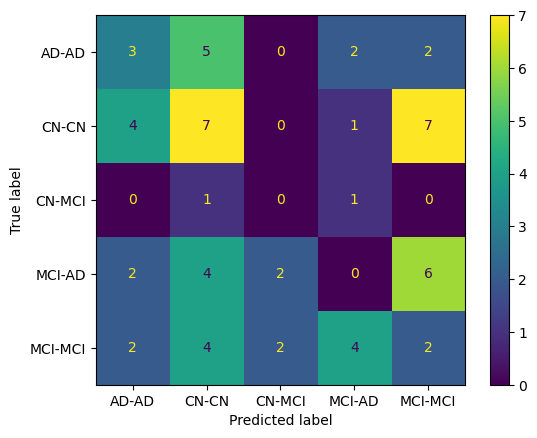

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

mlp_model = MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=1000, random_state=2023, solver='lbfgs')

mlp_model.fit(X_train, y_train)

mlp_score = mlp_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (mlp_score * 100))

predictionMLP = mlp_model.predict(X_test)

# Calculate F1-macro score
f1_macro = f1_score(y_test, predictionMLP, average='macro')
print(f"F1 Macro: {f1_macro:.2f}")

print(classification_report(y_test, predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test, predictionMLP)
plt.show()

## Stacking Classifier

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

estimators = [("gbm", gbm_model), ("svm", svm_model), ("mlp", mlp_model)]

stc_model = StackingClassifier(estimators,final_estimator = rfc_model) 

stc_model.fit(X_train, y_train)

StackingClassifier(estimators=[('gbm',
                                GradientBoostingClassifier(random_state=2023)),
                               ('svm',
                                SVC(C=1, gamma=0.1, kernel='linear',
                                    random_state=2023)),
                               ('mlp',
                                MLPClassifier(activation='tanh', alpha=0.001,
                                              early_stopping=True,
                                              hidden_layer_sizes=(100, 50),
                                              max_iter=1000, random_state=2023,
                                              solver='lbfgs'))],
                   final_estimator=RandomForestClassifier(bootstrap=False,
                                                          max_depth=10,
                                                          min_samples_split=15,
                                                          random_state=2023))

Accuracy: 37.70%
F1 Macro Score: 0.29
              precision    recall  f1-score   support

       AD-AD       0.44      0.33      0.38        12
       CN-CN       0.36      0.63      0.46        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.40      0.29      0.33        14
     MCI-MCI       0.33      0.21      0.26        14

    accuracy                           0.38        61
   macro avg       0.31      0.29      0.29        61
weighted avg       0.37      0.38      0.36        61



/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

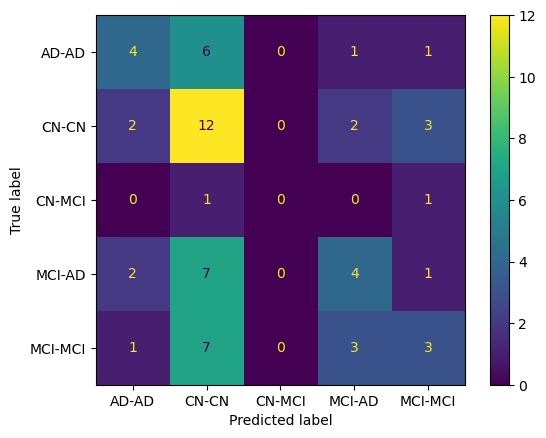

In [18]:
stc_score = stc_model.score(X_test, y_test)

print("Accuracy: %.2f%%" % (stc_score * 100))

stc_predictions = stc_model.predict(X_test)

# Calculate F1 Macro score
stc_f1_macro = f1_score(y_test, stc_predictions, average='macro')
print(f"F1 Macro Score: {stc_f1_macro:.2f}")

print(classification_report(y_test, stc_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, stc_predictions)
plt.show()

## Max Voting

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

estimators = [("gbm", gbm_model), ("svm", svm_model), ("mlp", mlp_model)]
mvt_model = VotingClassifier(estimators,voting='hard', weights=[2,2,1])

mvt_model.fit(X_train, y_train)

VotingClassifier(estimators=[('gbm',
                              GradientBoostingClassifier(random_state=2023)),
                             ('svm',
                              SVC(C=1, gamma=0.1, kernel='linear',
                                  random_state=2023)),
                             ('mlp',
                              MLPClassifier(activation='tanh', alpha=0.001,
                                            early_stopping=True,
                                            hidden_layer_sizes=(100, 50),
                                            max_iter=1000, random_state=2023,
                                            solver='lbfgs'))],
                 weights=[2, 2, 1])

Accuracy: 29.51%
F1 Macro Score: 0.20
              precision    recall  f1-score   support

       AD-AD       0.38      0.42      0.40        12
       CN-CN       0.35      0.58      0.44        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.00      0.00      0.00        14
     MCI-MCI       0.25      0.14      0.18        14

    accuracy                           0.30        61
   macro avg       0.20      0.23      0.20        61
weighted avg       0.24      0.30      0.26        61



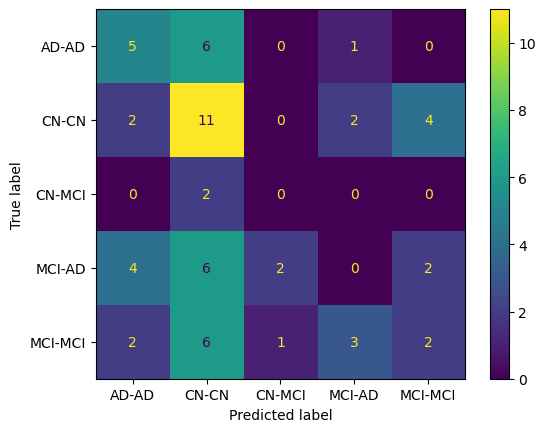

In [21]:
mvt_score = mvt_model.score(X_test, y_test)

# Make predictions using the Max Voting Classifier
mvt_predictions = mvt_model.predict(X_test)

mvt_score = mvt_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (mvt_score * 100))

# Calculate F1 Macro score
mvt_f1_macro = f1_score(y_test, mvt_predictions, average='macro')
print(f"F1 Macro Score: {mvt_f1_macro:.2f}")

print(classification_report(y_test, mvt_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, mvt_predictions)
plt.show()